# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
print(clean_hospital_read_df.info())#note that number of discharges had more non-null values, we only want the information that has both statistics
new_clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB
None


C:\Users\Kevin\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


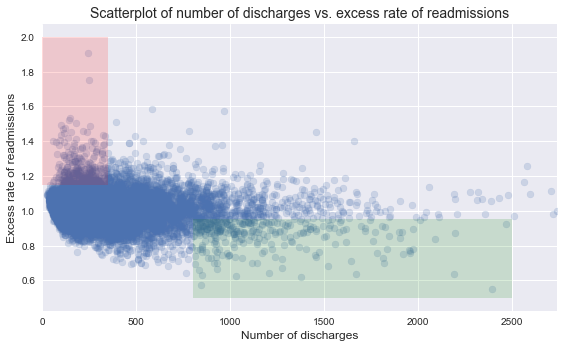

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

### ****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
#I do not agree with the above recommendations. The conclusions that were drawn aren't necessarily obvious from the single 
#scatter plot show. More visual representations to demonstrate how the conclusions were drawn would be better. Also, there was
#no hypothesis testing, either via bootstrapping or the frequentist method, 

In [6]:
#setup a hypothesis test regarding the correlation between number of discharges and excess rate of readmissions(using cleaned data)
# Null Hypothesis: There is no correlation between number of discharges and excessive readmission ratio
# Alternative Hypothesis : There is a correlation between number of discharges and excessive readmission ratio

correlation = np.corrcoef(x,y)[1,0] # correlation between hospital admissions and excess readmission ratio 
print(correlation)

-0.0930955428759


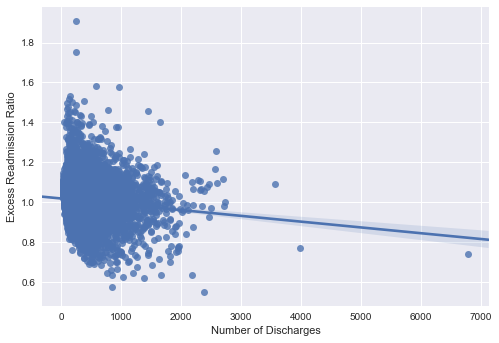

In [7]:
sns.regplot('Number of Discharges','Excess Readmission Ratio', data = new_clean_hospital_read_df)
plt.show()#visualize regression line--slope of regression line should be roughly the same as correlation coefficient calculated above

In [21]:
perm_replicates = np.empty(10000)
size = len(perm_replicates)

for i in range(size):
    perm_sample = np.random.permutation(x)
    perm_replicates[i] = np.corrcoef(perm_sample,y)[1,0]

print(perm_replicates[i])
p_value = np.sum(perm_replicates[i] >= correlation) / len(perm_replicates)
print('p :', p_value)


#we get a very small p-value, implying that we can reject the null hypothesis at a 1% significance level. This means that there is a 
#statistical significance to the correlation between excess readmission ratio and number of discharges. However, the magnitude of the
#negative correlation is so small that I would not recommened making significant investments in smaller hospitals to reduce excess readmissions


0.00440360341966
p : 0.0001


In [28]:
#create dataframe with only hospital discharges > 1000
df1 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 0) & (clean_hospital_read_df['Number of Discharges'] < 100)]
df_100 = df1[['Number of Discharges','Excess Readmission Ratio']]
df2 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 0) & (clean_hospital_read_df['Number of Discharges'] > 1000)]
df_1000 = df2[['Number of Discharges','Excess Readmission Ratio']]
#calculate observed means of Number of Discharges for both df1 and df2 as well as general admission ratio for both groups
observed_mean_100 = df_100['Excess Readmission Ratio'].mean()
observed_mean_1000 = df_1000['Excess Readmission Ratio'].mean()
observed_both = np.mean(np.concatenate((df_100['Excess Readmission Ratio'], df_1000['Excess Readmission Ratio'])))
print(observed_mean_100,observed_mean_1000, observed_both)#get observed ratio for both groups separately as well as together

1.0226183501683506 0.9783354211663071 1.01019981829


In [34]:
#set up null hypothesis: there is no difference in the observed means of excessive readmission ratio 
       #alternative hypothesis: there is a significant difference between the means of excess readmission ratio in small vs large hospitals

#shift both data sets such that they have the same means
sample_100_shifted = df_100['Excess Readmission Ratio'] - np.mean(df_100['Excess Readmission Ratio']) + observed_both
sample_1000_shifted = df_1000['Excess Readmission Ratio'] - np.mean(df_1000['Excess Readmission Ratio']) + observed_both


def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_samples = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_samples)
    return bs_replicates

bs_100_replicates = draw_bs_reps(sample_100_shifted, np.mean, 10000)
bs_1000_replicates = draw_bs_reps(sample_1000_shifted, np.mean, 10000)

diff_of_means_observed = np.mean(df_100['Excess Readmission Ratio']) - np.mean(df_1000['Excess Readmission Ratio'])
bs_replicates_diff = bs_100_replicates - bs_1000_replicates

p_value = np.sum(bs_replicates_diff >= diff_of_means_observed) / len(bs_replicates_diff)
print('p :',p_value)

#We reject the null hypothesis at 1% significance level. Again, it is difficult to say that there is any practical significance to 
# this difference. 

0.0


In [41]:
#The Scatterplot above is not the optimal way to show the relationship between excess readmission ratio and number of discharges

#group the hospitals into 3 categories based on number of discharges:

def discharge_category(number_of_discharges):
    if number_of_discharges <= 100:
        return 1
    elif (number_of_discharges > 100) & (number_of_discharges < 1000):
        return 2
    else:
        return 3
    
new_clean_hospital_read_df['Discharge Category'] = new_clean_hospital_read_df['Number of Discharges'].apply(discharge_category)


C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


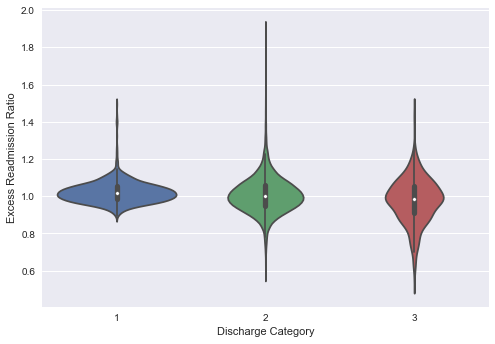

In [42]:
sns.violinplot(x='Discharge Category', y = 'Excess Readmission Ratio', data=new_clean_hospital_read_df)